In [32]:
from pathlib import Path
import os
import warnings
import sys

%load_ext autoreload
%autoreload

# ignore warnings for now ...
warnings.filterwarnings('ignore')

os.chdir('/Users/tommylees/github/ml_drought')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
from src.exporters import ERA5Exporter, VHIExporter
from src.preprocess import ERA5MonthlyMeanPreprocessor, VHIPreprocessor
from src.engineer import Engineer
from src.models import LinearRegression, RecurrentNetwork

# Exporters

In [52]:
data_dir = Path('data')
data_dir = Path('/Volumes/Lees_Extend/data/ecmwf_sowc/data2')
assert data_dir.exists()

e_exporter = ERA5Exporter(data_dir)

In [54]:
years = [2010, 2011]

for variable in ['2m_temperature', 'total_precipitation', 'evaporation']:
    e_exporter.export(variable=variable, granularity="monthly", selection_request={'year': years}, show_api_request=False)

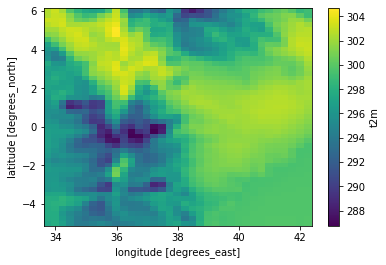

In [62]:
raw_data = xr.open_dataset(data_dir / 'raw' / 'reanalysis-era5-single-levels-monthly-means/2m_temperature/2010_2011' / '01_12.nc')
raw_data.mean(dim='time').t2m.plot()

# Preprocessors

In [57]:
e = ERA5MonthlyMeanPreprocessor(data_dir)
e.preprocess()

Reading data from /Volumes/Lees_Extend/data/ecmwf_sowc/data2/raw. Writing to /Volumes/Lees_Extend/data/ecmwf_sowc/data2/interim/reanalysis-era5-single-levels-monthly-means_interim
Processing 01_12.nc
selecting region: kenya from ds
Saving to /Volumes/Lees_Extend/data/ecmwf_sowc/data2/interim/reanalysis-era5-single-levels-monthly-means_interim/2010_01_12_2m_temperature_kenya.nc
Done for ERA5 01_12.nc
Processing 01_12.nc
selecting region: kenya from ds
Saving to /Volumes/Lees_Extend/data/ecmwf_sowc/data2/interim/reanalysis-era5-single-levels-monthly-means_interim/2010_2011_01_12_2m_temperature_kenya.nc
Done for ERA5 01_12.nc
Processing 01_12.nc
selecting region: kenya from ds
Saving to /Volumes/Lees_Extend/data/ecmwf_sowc/data2/interim/reanalysis-era5-single-levels-monthly-means_interim/2010_01_12_evaporation_kenya.nc
Done for ERA5 01_12.nc
Processing 01_12.nc
selecting region: kenya from ds
Saving to /Volumes/Lees_Extend/data/ecmwf_sowc/data2/interim/reanalysis-era5-single-levels-monthl

In [63]:
processed_data = xr.open_dataset(data_dir / 'interim/reanalysis-era5-single-levels-monthly-means_preprocessed/data_kenya.nc')
processed_data

<xarray.Dataset>
Dimensions:  (lat: 45, lon: 35, time: 24)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-31 2010-02-28 ... 2011-12-31
  * lon      (lon) float32 33.75 34.0 34.25 34.5 34.75 ... 41.5 41.75 42.0 42.25
  * lat      (lat) float32 6.0 5.75 5.5 5.25 5.0 ... -4.0 -4.25 -4.5 -4.75 -5.0
Data variables:
    e        (time, lat, lon) float32 ...
    t2m      (time, lat, lon) float32 ...
    tp       (time, lat, lon) float32 ...

# Engineer

In [68]:
engineer = Engineer(data_dir, process_static=False)
engineer.engineer(test_year=2011, target_variable='e', pred_months=3, expected_length=3)

Processing /Volumes/Lees_Extend/data/ecmwf_sowc/data2/interim/reanalysis-era5-single-levels-monthly-means_preprocessed/data_kenya.nc
Generating data for year: 2011, target month: 1
Max date: 2011-01-31, max input date: 2010-12-31, min input date: 2010-09-30
Saving data to /Volumes/Lees_Extend/data/ecmwf_sowc/data2/features/one_month_forecast/test/2011_1/x.nc
Saving data to /Volumes/Lees_Extend/data/ecmwf_sowc/data2/features/one_month_forecast/test/2011_1/y.nc
Generating data for year: 2011, target month: 2
Max date: 2011-02-28, max input date: 2011-01-31, min input date: 2010-10-31
Saving data to /Volumes/Lees_Extend/data/ecmwf_sowc/data2/features/one_month_forecast/test/2011_2/x.nc
Saving data to /Volumes/Lees_Extend/data/ecmwf_sowc/data2/features/one_month_forecast/test/2011_2/y.nc
Generating data for year: 2011, target month: 3
Max date: 2011-03-31, max input date: 2011-02-28, min input date: 2010-11-30
Saving data to /Volumes/Lees_Extend/data/ecmwf_sowc/data2/features/one_month_for

In [71]:
[f.name for f in (data_dir / 'features' / 'one_month_forecast' / 'test').iterdir()]

['2011_1',
 '2011_10',
 '2011_11',
 '2011_12',
 '2011_2',
 '2011_3',
 '2011_4',
 '2011_5',
 '2011_6',
 '2011_7',
 '2011_8',
 '2011_9']

# Models

In [83]:
rnn = RecurrentNetwork(data_dir, include_static=False)
lr = LinearRegression(data_dir, include_static=False)

In [84]:
lr.train()
lr.evaluate()

Training linear_regression for experiment one_month_forecast
8.435938941991433e-06
4.252922811054797e-06
4.77262839760287e-06
2.945667235162429e-06
2.2924270936802816e-06
4.737922992210149e-06
9.497308063034223e-06
7.164324284080522e-06
1.3638623711269807e-05
7.786606944227144e-06
8.29728857393483e-06
5.579561050800995e-06
2.6481699876071494e-06
5.977620212763001e-06
2.3583773955333233e-06
7.184274600172735e-06
5.455164630401247e-06
2.667688316833873e-06
1.1527970110698009e-05
8.036898688782692e-06
9.951159549929426e-06
8.202316165158158e-06
1.2764464487702143e-05
7.519289703100486e-06
2.725911836886895e-06
8.165320769050065e-06
3.4959158247321686e-06
1.5552037473619564e-05
2.7701409779225136e-06
5.696215782850286e-06
6.070142394870923e-06
4.595166225539463e-06
2.5835622846973395e-06
7.470239608353309e-06
4.812949374558225e-06
2.9038617674114668e-06
6.733855365388954e-06
3.1601725364471806e-06
4.571700000430468e-06
1.8366088658886002e-06
1.2864827545122854e-05
2.4017165014164703e-06
3.

# Analysis